In [1]:
# Cell 1: Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess


In [2]:
img_path = "D:/AIML/data/flower_photos/sunflower.jpg"  # ◄ change this

In [3]:
# Cell 2: Load your trained model
# (Update the path if you saved it elsewhere)
model = tf.keras.models.load_model("D:/AIML/data/ic_cnn_fun_Resnet50.h5")
model.summary()


Model: "resnet50_flowers"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Image_input (InputLayer)    [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 186, 186, 3)          0         ['Image_input[0][0]']         
                                                                                                  
 conv1_conv (Conv2D)         (None, 90, 90, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 90, 90, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                               

In [4]:
# Cell 3: Define your class names
# Make sure this matches the order you trained on:
class_names = ["daisy", "dandelion", "roses", "sunflowers", "tulips"]


In [5]:
# Cell 4: Helper to load & preprocess a single image
IMG_SIZE = (180, 180)

def load_and_prep_resnet(img_path):
    # 1) Load & resize
    img = load_img(img_path, target_size=IMG_SIZE)
    # 2) To array (shape: H×W×3), dtype=float32, range [0–255]
    arr = img_to_array(img)
    # 3) ResNet50 preprocessing (BGR + mean subtraction + scaling)
    arr = resnet_preprocess(arr)
    # 4) Add batch dim → (1, H, W, 3)
    return np.expand_dims(arr, axis=0), img


In [6]:
# Cell 6: Run inference and visualize
input_tensor, orig_img = load_and_prep_resnet(img_path)

# Model prediction
probs    = model.predict(input_tensor)[0]
pred_idx = np.argmax(probs)
confidence = probs[pred_idx]
pred_class = class_names[pred_idx]

1/1 [==============================] - 1s 1s/step


Predicted: sunflowers  (confidence 99.38%)


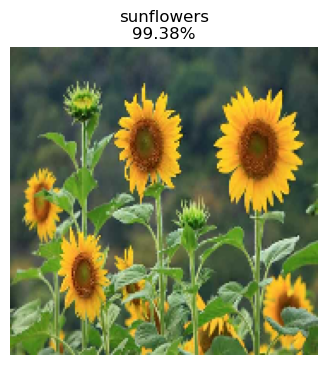

In [7]:
# Print and plot
print(f"Predicted: {pred_class}  (confidence {confidence:.2%})")
plt.figure(figsize=(4,4))
plt.imshow(orig_img)
plt.axis("off")
plt.title(f"{pred_class}\n{confidence:.2%}")
plt.show()